## PORTADA

Programa Coupling

Calculo de Sistemas de puesta a tierra.


Lenovo: Software_Coupling_2021

[Drive Lenovo2021](https://drive.google.com/drive/folders/1EslVhYiEc7RkAnjpxiuxYt86R4yRIBYl?usp=sharing) Descargar modulo


[Presentacion Coupling_Mod_GT07](https://docs.google.com/presentation/d/1ziPyLLkZ4fBkXJRttNJS0Mi7BFKedUB78p5qHGX8bVA/edit?usp=sharing)


Autores: German Moreno, Carlos Cardenas, Hector D, Gomez, Walter M. Villa, Jaime A. Valencia.


Fecha: 11-nov-2021

Modulos que se deben cargar:

Modulo_GT07.py

# Descripcion

**Objetivo:**

0. Incluir formula de resistividad y permitividad en funcion de la frecuencia

$\rho (f_{Hz}) =  \rho _{0}  \big( \frac{100}{f_{Hz}}\big) ^{0.072} $


$ \epsilon_{r}  (f_{Hz}) =  2.34*10^{6} \big(\rho _{0}^{-0.535}\big)    \big(f_{Hz} ^{-0.597}\big) $



1. Incluir calculo de impedancia impulso.(v_max/I_max)



Ejemplo Electrodo horizontal 70 m.

[libro Capitulo 4](https://docs.google.com/document/d/1lzkIKQoMII6ABE0-Utjo9XODYbw3BLHS/edit)

# Importacion de modulos

In [ ]:
#importaciones
import os 
import numpy as np # entorno similar a Matlab
import matplotlib.pyplot as plt 
import matplotlib #ayuda matplotlib galery

#caso 
from scipy import optimize as OP
from scipy import integrate as IT
from Modulo_GT07 import *



# Funciones y grafico $\rho (f_{Hz})$ y $\epsilon_{r}  (f_{Hz})$

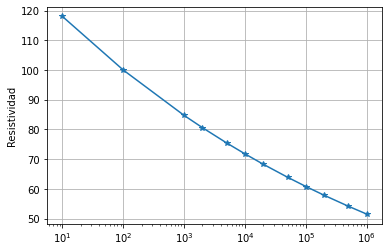

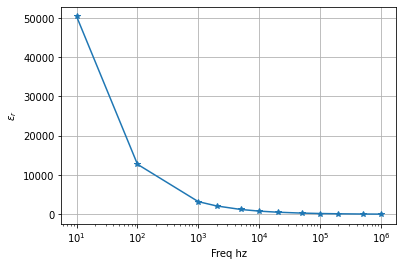

In [ ]:
#def Resistividad_f(ro,fhz):
#  """
#  ver. 2021-nov-11
#  """
#  a = 100/fhz
#  a1 = np.power(a,0.072)
#  b = ro * a1
#  return b

#def Permitividad_f(ro, fhz):
#  """

#  Ver. 2021-nov-11
#  """
#  a = np.power(ro,-0.535)
#  b = np.power(fhz,-0.597)
#  c = 2.34e6*a*b
#  return c

# Estas funciones quedaron incluidas en el modulo_GT06.py
#ejemplo grafico
ro1 = 100
Fr = [1e1,1e2,1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5,5e5,1e6]
Ro_f = []
Er_f = []
for q in Fr:
  Ro_f.append(Resistividad_f(ro1, q))
  Er_f.append(Permitividad_f(ro1, q))

plt.figure(1)
plt.semilogx(Fr,Ro_f,"*-")
plt.ylabel("Resistividad")
plt.grid("on")

plt.figure(2)
plt.semilogx(Fr,Er_f,"*-")
plt.ylabel("$\epsilon_{r}$")
plt.xlabel("Freq hz")
plt.grid("on")

plt.show()

# Caso: Electrodo horizontal de 70 m

Calculo contrapeso horizontal de 70 m con impedancia interna. Caso base con permitividad electrica constante.


*   El libro no describe el numero de segmentos
*   El libro no describe la impedancia interna del cable



In [ ]:
### CODIGO PPAL############
## Electrodo vertical
# ro=100.0 er=15  Radio=8 mm
# Clase SPT_01()
# SPT_01(freq, ro=100, er=15, Kp=0, seg_i=4, K_zi=0,K_fr=0)
#        freq: frecuencia en Hz
#        ro: resistividad de tierra en ohms-m
#        er: permitividad electrica relativa
#        Kp: constante de propagacion
#        seg_i: segmentos de integracion numerica
#        K_zi: 0 sin calculo de impedancia conductor
#              1 con calculo de impedancia conductor 
#        K_fr=0 resistividad y permitividad constanstantes #adicion 2021-nov-11
#            =1  variando con la frecuencia
# ENSAYO CON PARAMETROS DEPENDIENTES DE FRECUENCIA

S1 = SPT_01(60, ro=100.0, er=15, Kp=0, seg_i=50, K_zi=1, K_fr=1)#Parametros SPT

##Datos conductores STP
ps=35 # particion 0- minima posible,  1 maxima posible, Mayor 1==numero segmentos

#Formato de datos conductor
#Ad = [Pi_x, Pi_y, Pi_z, Pf_x, Pf_y, Pf_z, Radio, conductancia]
Conductancia = 4545454.54

####ediciones conductores
Ad1 = [0,0,0.5,70,0,0.5,0.008, Conductancia]#conductor 1

#####  fin edicion
print("Datos leidos: \n",Ad1) #formato: Pi(x,y,z), Pf(x,y,z), Radio; conductividad

S1.Add_conduct([Ad1],ps) #funcion para adicionar conductores

print("\nClase Sistema de Puesta a Tierra: \n",S1)


Datos leidos: 
 [0, 0, 0.5, 70, 0, 0.5, 0.008, 4545454.54]
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo

Clase Sistema de Puesta a Tierra: 
 Instancia clase SPT_01
Archivo datos: Ninguno
Total Conductores: 1
Numero Nodos: 36
Numero Ramas: 35


Numero de nodos:  36
Nodo numero:  2  Coord:  (40.0, 0.0, 0.5)
Nodo numero:  3  Coord:  (60.0, 0.0, 0.5)
Nodo numero:  6  Coord:  (10.0, 0.0, 0.5)
Nodo numero:  7  Coord:  (30.0, 0.0, 0.5)
Nodo numero:  18  Coord:  (50.0, 0.0, 0.5)
Nodo numero:  19  Coord:  (70.0, 0.0, 0.5)
Nodo numero:  20  Coord:  (0.0, 0.0, 0.5)
Nodo numero:  22  Coord:  (20.0, 0.0, 0.5)
Nodo a ver: 20


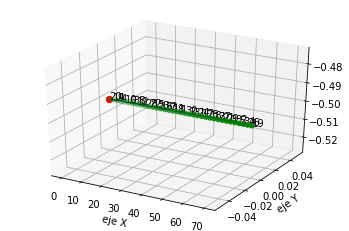

In [ ]:
##visualiza nodos en conductor

print("Numero de nodos: ",len(S1.L_nodos))

#obtener nodo origen
for i,q in enumerate(S1.L_nodos):
  nnn = int(q[0])
  pro = nnn==0 or nnn==10 or nnn==20 or nnn==30 or nnn==40 or nnn==50 or nnn==60 or nnn==70
  if pro and q[1]==0 and q[2]==0.5:
    print("Nodo numero: ",i," Coord: ",q)
    

N_ver = int(input("Nodo a ver: "))
S1.Show_nodos(N_ver)

# Calculo Zt (Solve_SPT01)

Capitulo 4:"que en bajas frecuencias presentaría una resistencia a tierra de 2.93 Ω." (frecuencia de calculo = ???)

In [ ]:
#se define la clase solucion con argumento el sistema
# de puesta a tierra S1
S_S1 = Solve_SPT01(S1)#clase solucion sistema puesta a tierra
print("Objeto S_S1: ",S_S1)

#calculo de impedancia de tierra una sola frecuencia
S_S1.Selec_cur(20)#nodo de aplicacion de corriente
print("Frecuencia de calculo: ",S_S1.spt.freq)
print("Impedancia Tierra: ",round(S_S1.Zt_1f,11))

Objeto S_S1:  Clase solucion SPT
Z_tierra:  3.0874691767828746
Frecuencia de calculo:  60
Impedancia Tierra:  3.08746917678


# Grafico Magnitud Zt(f)

Pendiente comparar con Gtierras ??

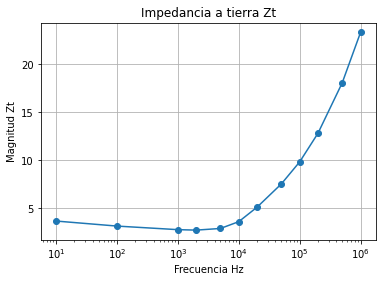

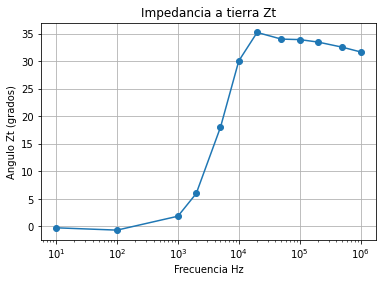

In [ ]:
#Calculo impedancia a tierra un vector
# se programa metodO en clase Solve_SPT
#def Show_Zt_Freq(self):

S_S1.Selec_cur1([1,1,1,1,1,1,1,1,1,1,1,1],[1e1,1e2,1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5,5e5,1e6],20)
S_S1.Show_Zt_Freq()

In [ ]:
##Tabla de valores
print("==Freq===!=======Zt=======!====mag Zt=====")
for i,qz in enumerate(S_S1.HHz):
  
  s = "{:8.0f} !  {:7.4f} !   {:7.3f} !".format(qz,S_S1.ZZ[i],abs(S_S1.ZZ[i]))
  print(s)



==Freq===!=======Zt=======!====mag Zt=====
      10 !  3.6235-0.0163j !     3.623 !
     100 !  3.0972-0.0367j !     3.097 !
    1000 !  2.7229+0.0878j !     2.724 !
    2000 !  2.6616+0.2786j !     2.676 !
    5000 !  2.7099+0.8807j !     2.849 !
   10000 !  3.0814+1.7841j !     3.561 !
   20000 !  4.1469+2.9299j !     5.078 !
   50000 !  6.2176+4.1993j !     7.503 !
  100000 !  8.1356+5.4757j !     9.807 !
  200000 !  10.6758+7.0647j !    12.802 !
  500000 !  15.2274+9.7261j !    18.069 !
 1000000 !  19.8547+12.2644j !    23.337 !


# Lectura señal

Numero de Muestras:  (801, 2)
Atributos: T_onda, V_onda


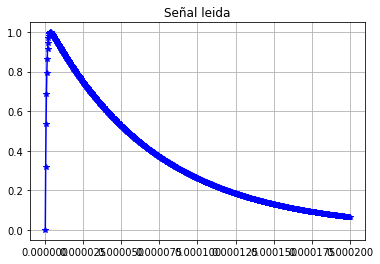

Sample time:  2.5e-07
Sample frequency: 4000000.0


In [ ]:
S_S1.Read_signal01("signal_07.txt")
deltaT = S_S1.T_onda[1]-S_S1.T_onda[0]
S_freq = 1/deltaT
print("Sample time: ",deltaT)
print("Sample frequency:",S_freq)

# Respuesta en el tiempo

Nodo inyeccion I:  20
Nodo Observacion V:  6
Nodo Observacion V:  22
Nodo Observacion V:  7
Nodo Observacion V:  2
Nodo Observacion V:  18
Nodo Observacion V:  3
Nodo Observacion V:  19


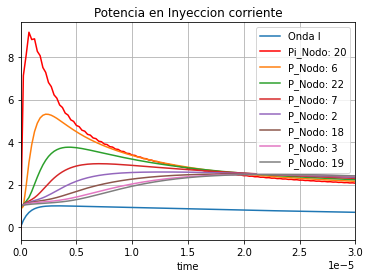

In [ ]:
S_S1.Get_Vtime(20,[6,22,7,2,18,3,19],t_sup=30e-6) 
#Nodo 20: 0 mts 
#[10,20,30,40,50,60,70]mts

#Datos Nodo inyeccion y nodos observacion 
#S_S1.V_t
#S_S1.Vver_t


Nodo inyeccion I:  20
Z_impulso inyeccion:  45871.478819607284
Nodo Observacion V:  6
Z_impulso inyeccion:  26575.545103322656
Nodo Observacion V:  22
Z_impulso inyeccion:  18802.977258125833
Nodo Observacion V:  7
Z_impulso inyeccion:  14919.02641076919
Nodo Observacion V:  2
Z_impulso inyeccion:  12966.68973161325
Nodo Observacion V:  18
Z_impulso inyeccion:  12496.393980523922
Nodo Observacion V:  3
Z_impulso inyeccion:  12404.549698545934
Nodo Observacion V:  19
Z_impulso inyeccion:  12403.97912201964


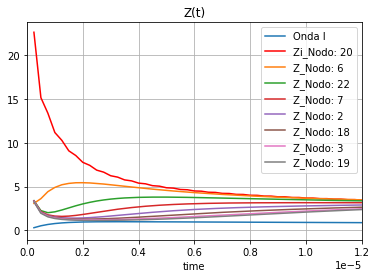

In [ ]:
S_S1.Get_Ztime(20,[6,22,7,2,18,3,19]) 

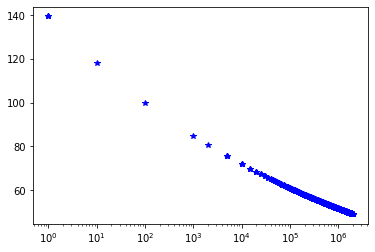

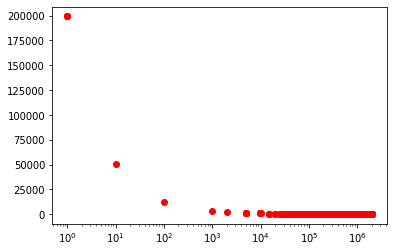

In [ ]:
#Datos almacenados de calculo en frecuencia
gg = np.array(S1.ro_f)
jj = np.array(S1.epsilon_f)

plt.figure(1)
plt.semilogx(gg[:,0],gg[:,1],"b*")

plt.figure(2)
plt.semilogx(jj[:,0],jj[:,1],"ro")
plt.show()

# Resultados y conclusiones

**Resultados y analisis:**

Similares a los de Gtierras, pero se debe hacer simulacion con frecuencia de muestreo de 2 Mhz.

La grafica del libro 4.2 es del potencial y no de impedancia.







**Conclusiones:**




**Referencias:**